In [82]:
# pip install github3.py command for install github3
# execute pip install github3.py command from the the command window/terminal
import github3, json
import os
#import cPickle as pickle
import pandas as pd                                    # panda's nickname is pd
from fbprophet import Prophet
import numpy as np                                     # numpy as np
from pandas import DataFrame, Series                   # for convenience
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# Get an API key for GitHub and set it as GITHUB_TOKEN
# Here is the URL to generate your GITHUB_TOKEN
# https://help.github.com/articles/creating-an-access-token-for-command-line-use/

GITHUB_TOKEN = 'd14e9f79e44f66bdc12e09bee463a3bd1225c98f'
ORG = 'SPM587SP19'                     
REPO = 'SCM587SP19'
FILENAME_ISSUES = ORG + '_pull.json'

In [84]:
gh = github3.login(token=GITHUB_TOKEN)

f = open(FILENAME_ISSUES, 'w')
for issue in gh.search_issues('type:pr repo:SPM587SP19/SCM587SP19'):          # Find pulls from given Repo
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['PullCount'] = 1
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
f.close()

INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned


In [85]:
import json
listOfPulls = [json.loads(line) for line in open('SPM587SP19_pull.json')]
pull_dataframe = DataFrame(listOfPulls)
pull_dataframe.head()

,PullCount,State,closed_at,created_at
0,1,closed,2019-04-20,2019-04-20
1,1,closed,2019-04-19,2019-04-19
2,1,closed,2019-04-18,2019-04-18
3,1,closed,2019-04-20,2019-04-13
4,1,closed,2019-04-11,2019-04-11


In [86]:
pull_dataframe['created_at'] = pd.to_datetime(pull_dataframe['created_at'], errors='coerce')
p = pull_dataframe.groupby(pull_dataframe['created_at'].dt.date).sum().reset_index()
p

,created_at,PullCount
0,2019-03-28,1
1,2019-04-01,1
2,2019-04-02,25
3,2019-04-03,25
4,2019-04-04,15
5,2019-04-05,5
6,2019-04-06,4
7,2019-04-07,6
8,2019-04-08,6
9,2019-04-09,22


In [87]:
pull_dataframe.dtypes

PullCount              int64
State                 object
closed_at             object
created_at    datetime64[ns]
dtype: object

In [88]:
p= p.rename(index=str, columns={'created_at': 'ds',
                        'PullCount': 'y'})
#pull_dataframe_created = pull_dataframe_created.rename(index=str, columns={"created_at": "ds", "PullCount": "y"})
p = p[['ds', 'y']]
p.head()

,ds,y
0,2019-03-28,1
1,2019-04-01,1
2,2019-04-02,25
3,2019-04-03,25
4,2019-04-04,15


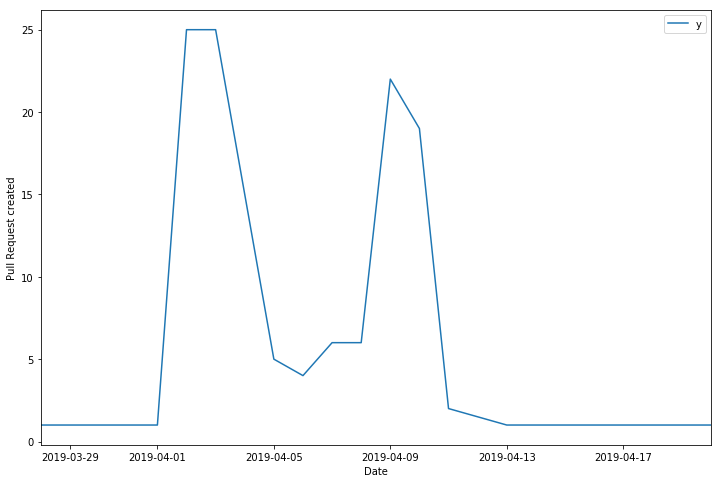

In [89]:
plot1 = p.set_index('ds').plot(figsize=(12, 8))
plot1.set_ylabel('Pull Request created')
plot1.set_xlabel('Date')
plt.show()


In [90]:
p_create = Prophet()
p_create.fit(p)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.0.


In [91]:
future = p_create.make_future_dataframe(periods=365)
future.tail()

,ds
376,2020-04-15
377,2020-04-16
378,2020-04-17
379,2020-04-18
380,2020-04-19


In [92]:
forecast = p_create.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
376,2020-04-15,19.984011,15.502823,24.939865
377,2020-04-16,3.005603,-1.523440,7.746970
378,2020-04-17,0.996985,-3.397634,5.580329
379,2020-04-18,0.196313,-4.326989,5.115844
380,2020-04-19,3.964210,-0.810030,8.428048


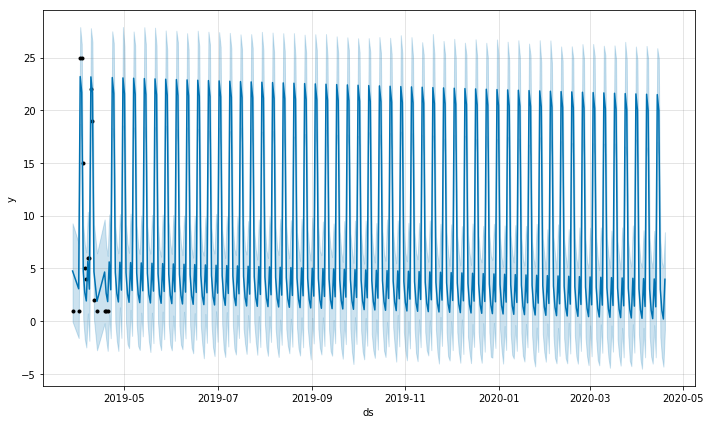

In [93]:
fig1 = p_create.plot(forecast)

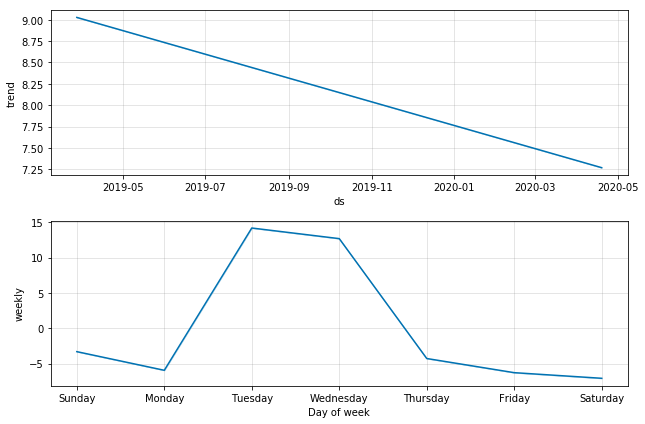

In [94]:
fig1 = p_create.plot_components(forecast)

In [95]:
pull_dataframe['closed_at'] = pd.to_datetime(pull_dataframe['closed_at'], errors='coerce')

pclosed = pull_dataframe.groupby(pull_dataframe['closed_at'].dt.date).sum().reset_index()
pclosed

,closed_at,PullCount
0,2019-03-29,1
1,2019-04-01,1
2,2019-04-02,25
3,2019-04-03,25
4,2019-04-04,15
5,2019-04-05,4
6,2019-04-06,4
7,2019-04-07,3
8,2019-04-08,6
9,2019-04-09,19


In [96]:
pclosed = pclosed.rename(index=str, columns={"closed_at": "ds", "PullCount": "y"})
pclosed = pclosed[['ds', 'y']]
pclosed

,ds,y
0,2019-03-29,1
1,2019-04-01,1
2,2019-04-02,25
3,2019-04-03,25
4,2019-04-04,15
5,2019-04-05,4
6,2019-04-06,4
7,2019-04-07,3
8,2019-04-08,6
9,2019-04-09,19


## Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

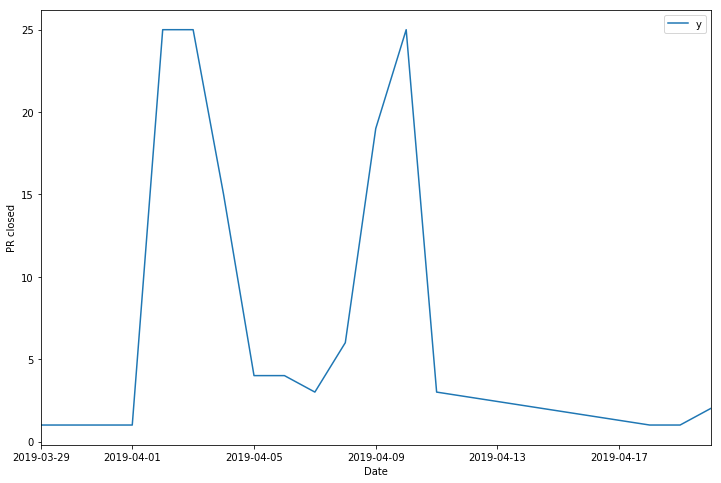

In [97]:
plot2 = pclosed.set_index('ds').plot(figsize=(12, 8))
plot2.set_ylabel('PR closed')
plot2.set_xlabel('Date')

plt.show()


In [98]:
p1 = Prophet()
p1.fit(pclosed)
future = p1.make_future_dataframe(periods=30)
future.tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.0.


,ds
40,2019-05-16
41,2019-05-17
42,2019-05-18
43,2019-05-19
44,2019-05-20


In [99]:
forecast = p1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
40,2019-05-16,-0.862409,-4.490183,2.648859
41,2019-05-17,-6.154329,-9.674660,-2.723522
42,2019-05-18,-4.237652,-7.544123,-0.839256
43,2019-05-19,-6.261311,-9.598660,-2.688337
44,2019-05-20,-5.579398,-8.929138,-2.055117


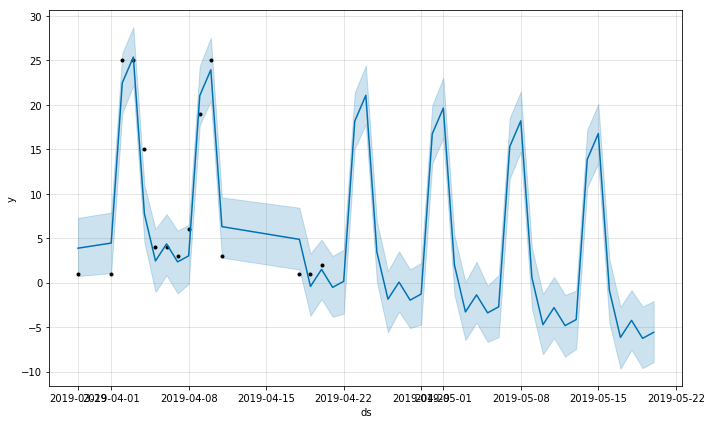

In [100]:
fig2 = p1.plot(forecast)

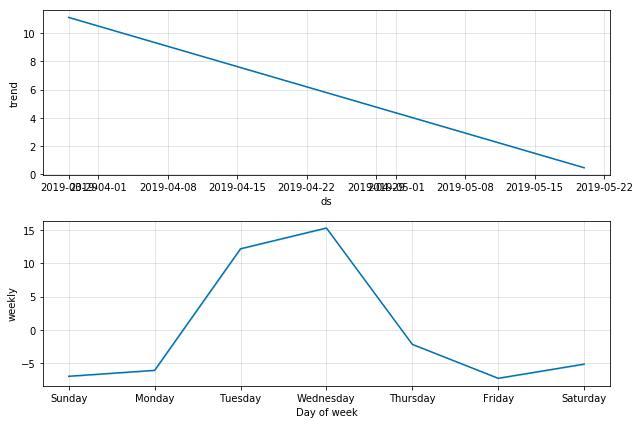

In [101]:
fig2 = p1.plot_components(forecast)